<a href="https://colab.research.google.com/github/vacheharutyunyan/machine-learning-projects/blob/main/melburn_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Download latest version
path = kagglehub.dataset_download("dansbecker/melbourne-housing-snapshot")

print("Path to dataset files:", path)

df = pd.read_csv(path + '/melb_data.csv')
df.head()

100%|██████████| 451k/451k [00:00<00:00, 12.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/dansbecker/melbourne-housing-snapshot/versions/5


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [ ]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [ ]:
df.shape

(13580, 21)

In [ ]:
df.isna().sum()

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,0
Method,0
SellerG,0
Date,0
Distance,0
Postcode,0


In [ ]:
df[['Price', 'YearBuilt', 'BuildingArea']].corr()

,Price,YearBuilt,BuildingArea
Price,1.000000,-0.323617,0.090981
YearBuilt,-0.323617,1.000000,0.019665
BuildingArea,0.090981,0.019665,1.000000


In [ ]:
df = df.drop(['BuildingArea', 'YearBuilt', 'CouncilArea'], axis=1)
df['Car'].fillna(df['Car'].median(), inplace = True)

/tmp/ipython-input-2018785630.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Car'].fillna(df['Car'].median(), inplace = True)


In [ ]:
df = pd.get_dummies(df, columns=['Type', 'Method', 'Regionname'])

In [ ]:
seller_counts = df['SellerG'].value_counts()

In [ ]:
rare_list = seller_counts[seller_counts <= 50].index
rare_list
df['SellerG'] = df['SellerG'].apply(lambda x: 'Other' if x in rare_list else x)
df

,Suburb,Address,Rooms,Price,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,...,Method_SP,Method_VB,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,Abbotsford,85 Turner St,2,1480000.0,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,...,False,False,False,False,True,False,False,False,False,False
1,Abbotsford,25 Bloomburg St,2,1035000.0,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,...,False,False,False,False,True,False,False,False,False,False
2,Abbotsford,5 Charles St,3,1465000.0,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,...,True,False,False,False,True,False,False,False,False,False
3,Abbotsford,40 Federation La,3,850000.0,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,...,False,False,False,False,True,False,False,False,False,False
4,Abbotsford,55a Park St,4,1600000.0,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,1245000.0,Barry,26/08/2017,16.7,3150.0,4.0,2.0,...,False,False,False,False,False,False,True,False,False,False
13576,Williamstown,77 Merrett Dr,3,1031000.0,Williams,26/08/2017,6.8,3016.0,3.0,2.0,...,True,False,False,False,False,False,False,False,True,False
13577,Williamstown,83 Power St,3,1170000.0,Raine,26/08/2017,6.8,3016.0,3.0,2.0,...,False,False,False,False,False,False,False,False,True,False
13578,Williamstown,96 Verdon St,4,2500000.0,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
seller_freq = df['SellerG'].value_counts() / len(df)
df['SellerG'] = df['SellerG'].map(seller_freq)

In [ ]:
X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.dtypes

,0
Suburb,object
Address,object
Rooms,int64
SellerG,float64
Date,object
Distance,float64
Postcode,float64
Bedroom2,float64
Bathroom,float64
Car,float64


In [ ]:
scaler = StandardScaler()

numeric_cols = X_train.select_dtypes(include=['float64','int64']).columns
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])




In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print('MSE is -> ', mse)
print('R^2 is -> ', r2)

MSE is ->  205164634294.63336
R^2 is ->  0.48349073879785576


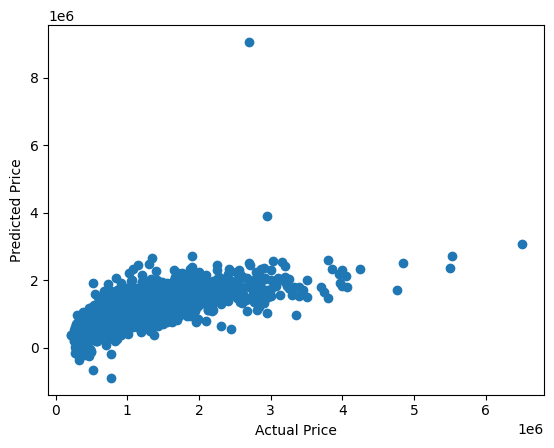

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()


In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

In [ ]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print('MSE is -> ', mse_rf)
print('R^2 is -> ', r2_rf)

MSE is ->  80501270714.49591
R^2 is ->  0.7973351888568365


In [ ]:
gbr_model = GradientBoostingRegressor(
    n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42
)
gbr_model.fit(X_train_scaled, y_train)
y_pred_gbr = gbr_model.predict(X_test_scaled)

In [ ]:
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print('MSE is -> ', mse_gbr)
print('R^2 is -> ', r2_gbr)

MSE is ->  89848479959.83156
R^2 is ->  0.773803257253669


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
}

In [ ]:
grid = GridSearchCV(rf_model, param_grid, scoring='r2', cv=5)
grid.fit(X_train_scaled, y_train)
best_model = grid.best_estimator_

In [ ]:
y_pred = best_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best parameters:", grid.best_params_)
print("MSE:", mse)
print("R²:", r2)


Best parameters: {'max_depth': 7, 'n_estimators': 300}
MSE: 110037813263.13554
R²: 0.7229758928567528
